In [1]:
# Gihad Abdelhamid
# 20196899
# MMA
# W21
# 869
# 16-Aug-2020



## Answer to Question 1, Part 1a
Load, clean, and preprocess the data as you find necessary

In [2]:
#Import Packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Read in data from jewelry_customers.csv I am assuming that you have the file in the same directory as the py file
df = pd.read_csv("jewelry_customers.csv")

In [4]:
# Check some data frame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [5]:
# Checking if there is any negative values
df.index[df['Age'] < 0]
df.index[df['Income'] < 0]
df.index[df['SpendingScore'] < 0]
df.index[df['Savings'] < 0]


Int64Index([], dtype='int64')

Int64Index([], dtype='int64')

Int64Index([], dtype='int64')

Int64Index([], dtype='int64')

In [6]:
# Convert the frame 
X=df.to_numpy()

In [7]:
# Print the frame
X

array([[5.80000000e+01, 7.77690000e+04, 7.91328777e-01, 6.55982992e+03],
       [5.90000000e+01, 8.17990000e+04, 7.91082047e-01, 5.41766143e+03],
       [6.20000000e+01, 7.47510000e+04, 7.02656952e-01, 9.25899297e+03],
       ...,
       [9.00000000e+01, 3.52970000e+04, 3.55149019e-01, 1.60914020e+04],
       [9.10000000e+01, 2.06810000e+04, 3.54679169e-01, 1.84010884e+04],
       [8.90000000e+01, 3.02670000e+04, 2.89310066e-01, 1.43863519e+04]])

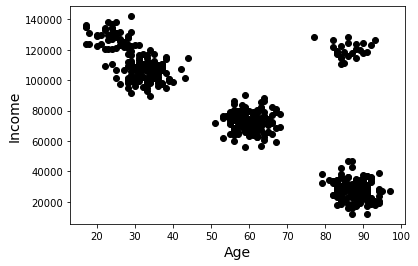

In [8]:
# Plotting Age and Income
plt.figure();
plt.scatter(X[:,0],X[:,1], c="black")
plt.xlabel('Age', fontsize=14);
plt.ylabel('Income', fontsize=14);

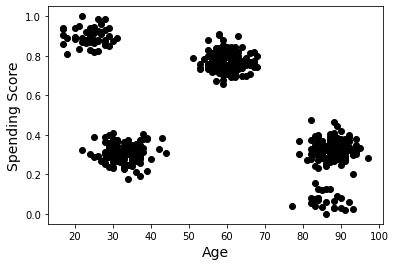

In [9]:
# Plotting Age and SpendingScore
plt.figure()
plt.scatter(X[:,0],X[:,2], c="black")
plt.xlabel('Age', fontsize=14);
plt.ylabel('Spending Score', fontsize=14);

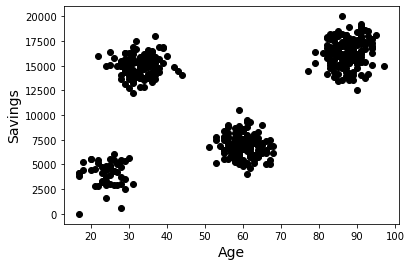

In [10]:
# Plotting Age and Savings
plt.figure()
plt.scatter(X[:,0],X[:,3], c="black")
plt.xlabel('Age', fontsize=14);
plt.ylabel('Savings', fontsize=14);

In [11]:
#Standardizing the data and saving it in a new variable
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[-4.22871323e-02,  6.27330450e-02,  1.10359261e+00,
        -1.07246676e+00],
       [-8.21109365e-04,  1.74810526e-01,  1.10264136e+00,
        -1.30347264e+00],
       [ 1.23576959e-01, -2.11999168e-02,  7.61727378e-01,
        -5.26555609e-01],
       ...,
       [ 1.28462560e+00, -1.11844679e+00, -5.78054216e-01,
         8.55312853e-01],
       [ 1.32609162e+00, -1.52492929e+00, -5.79865675e-01,
         1.32245159e+00],
       [ 1.24315958e+00, -1.25833506e+00, -8.31889623e-01,
         5.10463045e-01]])

## Answer to Question 1, Part 1b

In [12]:
# Cluster the data using any clustering algorithm discussed in class. 
# Measure goodness-of-fit. Try different values of hyper parameters to see how they affect goodness-of-fit.

# The following code uses KMeans as a clustering algorithm and at the end, 
# I will use DBSCAN to validate the approach that I followed at the beginning

# Initializing the cluster size with 5
K=5


k_means=KMeans(init="k-means++", n_clusters=K, random_state=42)
k_means.fit(X_scaled)

# check the Inertia
print('WCSS/Intertia Score for K: {}'.format(K))
k_means.inertia_

# check the Sillouette
print('Sillouette Score for K: {}'.format(K))
silhouette_score(X, k_means.labels_)
sample_silhouette_values = silhouette_samples(X, k_means.labels_)
sample_silhouette_values

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

WCSS/Intertia Score for K: 5


66.5111137485908

Sillouette Score for K: 5


0.6617771614964708

array([ 0.7593478 ,  0.60393143,  0.79983383,  0.82732463,  0.81074038,
        0.64280439,  0.79123199,  0.52816578,  0.79202129,  0.88010056,
       -0.19060509,  0.65344634,  0.65237685,  0.52282356,  0.8430854 ,
        0.57089441,  0.8461903 ,  0.85304168,  0.81657686,  0.66200159,
        0.67172552,  0.58369993,  0.78023878,  0.85860121,  0.67656006,
        0.36583477,  0.5734943 ,  0.71508074,  0.71900084,  0.77760482,
        0.80267033,  0.84769228,  0.81141088,  0.75144176,  0.67495041,
        0.8220696 ,  0.84396241,  0.75316851,  0.65540655,  0.15676139,
        0.84850074,  0.86169665,  0.60161646,  0.81424739,  0.83894721,
        0.6174215 ,  0.68377889,  0.51449511,  0.67723779,  0.82840266,
        0.81542913,  0.6345067 ,  0.3325519 ,  0.87388784,  0.69794505,
        0.88002121,  0.67776573,  0.87431346,  0.86678046,  0.82491762,
        0.82781895,  0.8667441 ,  0.8610624 ,  0.83450934,  0.63849114,
        0.84438883,  0.88126726,  0.50033018,  0.62043356,  0.84

In [13]:
# Print the cluster IDs
k_means.labels_

array([2, 2, 2, 2, 0, 3, 2, 0, 0, 0, 4, 1, 1, 1, 2, 4, 2, 0, 0, 4, 1, 4,
       2, 0, 4, 3, 3, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 0, 3, 2,
       2, 3, 4, 3, 1, 2, 0, 1, 3, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 3, 3, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 3, 2, 4, 2, 0, 0, 1, 1, 2,
       2, 2, 2, 2, 3, 0, 2, 3, 1, 2, 2, 1, 1, 3, 1, 3, 1, 0, 0, 1, 1, 2,
       0, 1, 2, 1, 1, 1, 2, 1, 3, 0, 1, 0, 0, 0, 1, 4, 2, 0, 2, 2, 1, 2,
       1, 2, 3, 0, 4, 3, 2, 1, 0, 2, 2, 3, 2, 3, 2, 4, 2, 0, 2, 1, 0, 2,
       0, 4, 1, 2, 0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2,
       2, 0, 0, 0, 2, 2, 1, 3, 3, 0, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 3, 1,
       0, 0, 0, 1, 2, 1, 2, 1, 2, 0, 3, 2, 0, 0, 0, 0, 2, 0, 1, 3, 1, 0,
       2, 2, 1, 0, 1, 3, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 1, 1, 3, 2,
       2, 2, 4, 2, 1, 0, 3, 3, 3, 0, 2, 1, 0, 0, 1, 1, 2, 2, 4, 2, 2, 0,
       2, 0, 1, 3, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 2, 2, 0, 1, 1, 4, 1, 0,
       0, 1, 4, 0, 0, 3, 2, 1, 1, 2, 1, 0, 0, 1, 2,

In [14]:
# Print the centers
k_means.cluster_centers_
means = scaler.inverse_transform(k_means.cluster_centers_)
means

array([[ 1.19238486, -1.32510593, -0.67963841,  0.97016358],
       [-1.08815238,  0.82744102, -0.75240648,  0.6270464 ],
       [ 0.03879611, -0.08524639,  1.02721559, -1.00569483],
       [-1.44466803,  1.46050665,  1.51057952, -1.57249636],
       [ 1.11876151,  1.23565419, -1.68367042,  0.59588052]])

array([[8.77755102e+01, 2.78661020e+04, 3.28800461e-01, 1.66592614e+04],
       [3.27777778e+01, 1.05265810e+05, 3.09926130e-01, 1.49627781e+04],
       [5.99554140e+01, 7.24480637e+04, 7.71518368e-01, 6.88997219e+03],
       [2.41800000e+01, 1.28029120e+05, 8.96891640e-01, 4.08752031e+03],
       [8.60000000e+01, 1.19944040e+05, 6.83780993e-02, 1.48086838e+04]])

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Income')

(array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

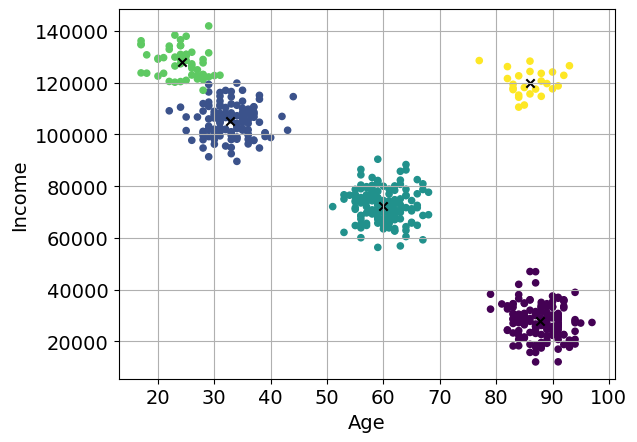

In [15]:
# Plot Age and Income and mark the cluster centers 
plt.style.use('default');

plt.grid(True);

sc = plt.scatter(X[:, 0], X[:, 1], s=20, c=k_means.labels_);
plt.xlabel('Age', fontsize=14);
plt.ylabel('Income', fontsize=14);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.scatter(means[:, 0], means[:, 1], marker='x',c="black")

for k=2, inertia=1022.3905044613807 and silhouette=0.5212589967674505
for k=3, inertia=384.8111859304379 and silhouette=0.6963481945884472
for k=4, inertia=189.70178796659562 and silhouette=0.7581191889903789
for k=5, inertia=66.5111137485908 and silhouette=0.8048976287755765
for k=6, inertia=61.13876892033643 and silhouette=0.6331809452561232
for k=7, inertia=56.88899998827784 and silhouette=0.446241357222514
for k=8, inertia=52.90937439137087 and silhouette=0.2968451088256839
for k=9, inertia=50.246926315561794 and silhouette=0.2977611570470311
for k=10, inertia=48.022888072269275 and silhouette=0.24875420845031


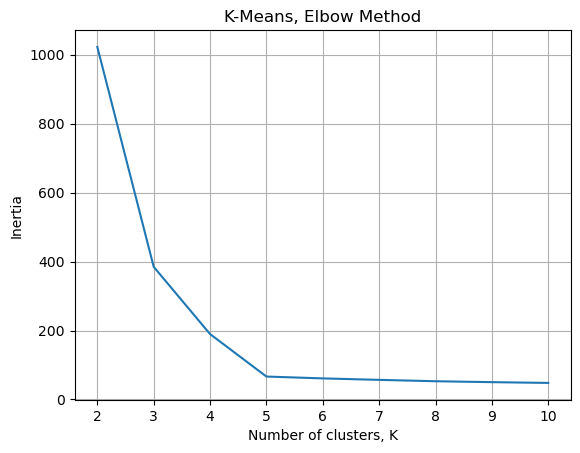

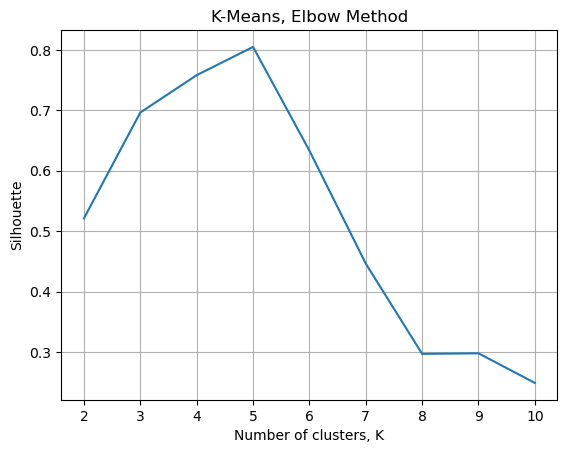

In [16]:
# Playing with K, setting between 2 and 11
inertias = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(init='k-means++', n_init=10, n_clusters=k, random_state=42).fit(X_scaled)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(X_scaled, kmeans.labels_)
    print("for k={}, inertia={} and silhouette={}".format(k,inertias[k], silhouettes[k]))
    
# Plotting the inertia values for each K value
plt.figure();
plt.grid(True);
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");

# Plotting the Silhouette values for each K value
plt.figure();
plt.grid(True);
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");

## Answer to Question 1, Part 1c

In [17]:
# Print the Stats for the whole data set
# The cluster size I selected is 5 based on the Inertia score

# rerun the KMeans for K value 5
K=5

k_means=KMeans(init="k-means++", n_clusters=K, random_state=42)
k_means.fit(X_scaled)

# Print Labels and cluster centers
#k_means.labels_
#k_means.cluster_centers_
means = scaler.inverse_transform(k_means.cluster_centers_)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [18]:
from scipy import stats

# List the column names to be used in the table
col_names = ['Age','Income','Spending Score','Savings']

# Set some display options
pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Define a function to create the stats in a table format
def stats_to_df(d, scaler):
    tmp_df = pd.DataFrame(columns=col_names)
    
    tmp_df.loc[0] = scaler.inverse_transform(d.minmax[0])
    tmp_df.loc[1] = scaler.inverse_transform(d.mean)
    tmp_df.loc[2] = scaler.inverse_transform(d.minmax[1])
    tmp_df.loc[3] = scaler.inverse_transform(d.variance)
    tmp_df.loc[4] = scaler.inverse_transform(d.skewness)
    tmp_df.loc[5] = scaler.inverse_transform(d.kurtosis)
    tmp_df.index = ['Min', 'Mean', 'Max', 'Variance', 'Skewness', 'Kurtosis'] 
    return tmp_df.T

# Print the 
print('All Data:')
print('Number of Instances: {}'.format(X.shape[0]))
d = stats.describe(X_scaled, axis=0)
display(stats_to_df(d, scaler))

# Print the stats for each cluster
labels=k_means.labels_
for i, label in enumerate(set(labels)):
    d = stats.describe(X_scaled[labels==label], axis=0)
    print('\nCluster {}:'.format(label))
    print('Number of Instances: {}'.format(d.nobs))
    display(stats_to_df(d, scaler))

All Data:
Number of Instances: 505


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,17.00,59.02,97.00,83.18,57.56,24.79
Income,12000.00,75513.29,142000.00,111541.90,70425.76,30539.63
Spending Score,0.00,0.51,1.00,0.76,0.57,0.14
Savings,0.00,11862.46,20000.00,16816.59,10068.59,4685.19



Cluster 0:
Number of Instances: 147


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,79.00,87.78,97.00,59.53,58.71,47.69
Income,12000.00,27866.10,46977.00,76669.86,80132.22,81449.08
Spending Score,0.20,0.33,0.47,0.51,0.59,0.63
Savings,13470.97,16659.26,20000.00,12145.91,11114.44,11991.20



Cluster 1:
Number of Instances: 126


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,22.00,32.78,44.00,59.62,62.86,66.99
Income,89598.00,105265.81,119877.00,76541.57,76634.13,64585.25
Spending Score,0.17,0.31,0.41,0.51,0.45,0.51
Savings,12207.53,14962.78,17968.55,12090.45,12134.49,10963.23



Cluster 2:
Number of Instances: 157


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,51.00,59.96,68.00,59.49,63.48,52.66
Income,56321.00,72448.06,90422.00,76596.27,80762.80,76774.09
Spending Score,0.66,0.77,0.91,0.51,0.61,0.58
Savings,4077.66,6889.97,10547.78,12086.41,13179.50,14336.46



Cluster 3:
Number of Instances: 50


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,17.00,24.18,31.00,59.58,49.02,45.82
Income,117108.00,128029.12,142000.00,76413.35,86686.66,52197.55
Spending Score,0.81,0.90,1.00,0.51,0.55,0.44
Savings,0.00,4087.52,6089.48,12192.66,6842.94,18038.91



Cluster 4:
Number of Instances: 25


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,77.00,86.00,93.00,59.58,56.77,58.46
Income,110582.00,119944.04,128596.00,76192.26,76326.08,48538.51
Spending Score,0.00,0.07,0.16,0.51,0.62,0.36
Savings,12554.69,14808.68,17833.09,12134.30,14948.38,14021.13


In [19]:
#trying DBSCAN

dbscan=DBSCAN(eps=0.4, min_samples=3)
dbscan.fit(X_scaled)
dbscan.labels_
k_means.cluster_centers_
scaler.inverse_transform(k_means.cluster_centers_)

silhouettes = {}
for eps in np.arange(0.1, 0.9, 0.1):
    db = DBSCAN(eps=eps, min_samples=3).fit(X_scaled)
    silhouettes[eps] = silhouette_score(X, db.labels_, metric='euclidean')
    print("for eps={}, silhouette={}".format(eps, silhouettes[eps]))


DBSCAN(algorithm='auto', eps=0.4, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

array([ 0,  0,  0,  0,  1,  2,  0,  1,  1,  1,  3,  4,  4,  4,  0,  3,  0,
        1,  1,  3,  4,  3,  0,  1,  3,  2,  2,  0,  1,  0,  0,  0,  1,  0,
        4,  0,  1,  0,  4,  4,  0,  1,  2,  0,  0,  2,  3,  2,  4,  0,  1,
        4,  2,  1,  0,  1,  4,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  2,
        2,  0,  0,  4,  1,  1,  4,  0,  4,  0,  0,  2,  0,  3,  0,  1,  1,
        4,  4,  0,  0,  0,  0,  0,  2,  1,  0,  2,  4,  0,  0,  4,  4,  2,
        4,  2,  4,  1, -1,  4,  4,  0,  1,  4,  0,  4,  4,  4,  0,  4,  2,
        1,  4,  1,  1,  1,  4,  3,  0,  1,  0,  0,  4,  0,  4,  0,  2,  1,
        3,  2,  0,  4,  1,  0,  0,  2,  0,  2,  0,  3,  0,  1,  0,  4,  1,
        0,  1,  3,  4,  0,  1,  0,  4,  1,  0,  4,  1,  4,  1,  0,  4,  0,
        1,  0,  4,  0,  1,  0,  0,  1,  1,  1,  0,  0,  4,  2,  2,  1,  4,
        0,  0,  0,  4,  1,  0,  0,  0,  1,  2,  4,  1,  1,  1,  4,  0,  4,
        0,  4,  0,  1,  2,  0,  1,  1,  1,  1,  0,  1,  4,  2,  4,  1,  0,
        0,  4,  1,  4,  2

array([[ 1.19238486, -1.32510593, -0.67963841,  0.97016358],
       [-1.08815238,  0.82744102, -0.75240648,  0.6270464 ],
       [ 0.03879611, -0.08524639,  1.02721559, -1.00569483],
       [-1.44466803,  1.46050665,  1.51057952, -1.57249636],
       [ 1.11876151,  1.23565419, -1.68367042,  0.59588052]])

array([[8.77755102e+01, 2.78661020e+04, 3.28800461e-01, 1.66592614e+04],
       [3.27777778e+01, 1.05265810e+05, 3.09926130e-01, 1.49627781e+04],
       [5.99554140e+01, 7.24480637e+04, 7.71518368e-01, 6.88997219e+03],
       [2.41800000e+01, 1.28029120e+05, 8.96891640e-01, 4.08752031e+03],
       [8.60000000e+01, 1.19944040e+05, 6.83780993e-02, 1.48086838e+04]])

for eps=0.1, silhouette=-0.7528707374898497
for eps=0.2, silhouette=0.015494236407499327
for eps=0.30000000000000004, silhouette=0.6305572281800832
for eps=0.4, silhouette=0.6544257194449412
for eps=0.5, silhouette=0.6617771614964708
for eps=0.6, silhouette=0.6617771614964708
for eps=0.7000000000000001, silhouette=0.6617771614964708
for eps=0.8, silhouette=0.6617771614964708
